# Classify Clothing
Develop a neural network classifier that can tell different types of clothing apart and compare it to simpler classifier. 

For full credit, you must comply with the following specifications:

1. You must use the Keras Fashion Mnist Data Set to train both neural net models
2. Train the neural net found in the beginners example at https://www.tensorflow.org/overview
3. Train a neural net with the following parameters:
  1. 2 convolution layers with at least 10 filters each
  1. max pool layer with a reduction factor of 2
  2. dense layer (you choose number of nodes)
  3. output layer is a dense layer of 10 nodes
4. Compare the activations of the two models you've trained. 

The bulk of the credit for this problem is assigned for the evaluation tasks:
1. For 1 example from each class, show all activations as images
2. Write a short paragraph (approx 3 sentences) evaluating the differences in the models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import models
from tensorflow.keras import models,layers,optimizers

Using TensorFlow backend.


In [34]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

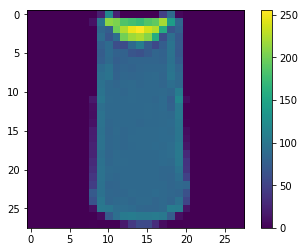

In [35]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(train_labels.shape)
print(test_labels.shape)


(60000,)
(10000,)


In [5]:
train_labels[0]

9

##### Train the neural net found in the beginners example at https://www.tensorflow.org/overview

In [6]:
import tensorflow as tf
#mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5262 - accuracy: 0.8122
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3999 - accuracy: 0.8545
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3643 - accuracy: 0.8675
Epoch 4/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3445 - accuracy: 0.8736
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3280 - accuracy: 0.8790
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34842113394737245, 0.8727]

In [21]:
from tensorflow.keras import models,layers,optimizers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [24]:
activations = activation_model.predict(train_images)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(60000, 26, 26, 10)


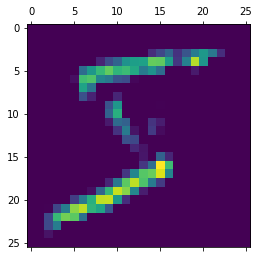

In [25]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

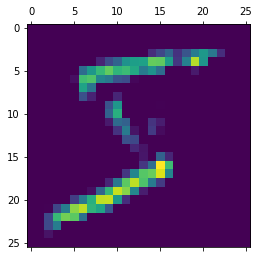

In [28]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

### Train a neural net with the following parameters:
convolution layers with at least 10 filters each

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0
train_images.shape

(60000, 28, 28)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        2912      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [37]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
train_images.shape

(60000, 28, 28, 1)

In [12]:
history = model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 836us/sample - loss: 0.2200 - accuracy: 0.9339
Epoch 2/5
60000/60000 [==============================] - 54s 905us/sample - loss: 0.0673 - accuracy: 0.9796
Epoch 3/5
60000/60000 [==============================] - 55s 921us/sample - loss: 0.0477 - accuracy: 0.9857
Epoch 4/5
60000/60000 [==============================] - 58s 962us/sample - loss: 0.0371 - accuracy: 0.9887
Epoch 5/5
60000/60000 [==============================] - 60s 998us/sample - loss: 0.0301 - accuracy: 0.9910


In [50]:
history = model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,validation_split= 0.4, epochs= 5, batch_size=64)

Train on 36000 samples, validate on 24000 samples
Epoch 1/5
36000/36000 [==============================] - 50s 1ms/sample - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0364 - val_accuracy: 0.9893
Epoch 2/5
36000/36000 [==============================] - 52s 1ms/sample - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 3/5
36000/36000 [==============================] - 54s 2ms/sample - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0339 - val_accuracy: 0.9920
Epoch 4/5
36000/36000 [==============================] - 54s 1ms/sample - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0194 - val_accuracy: 0.9950
Epoch 5/5
36000/36000 [==============================] - 54s 1ms/sample - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0233 - val_accuracy: 0.9950


from the pretrain model acc was 85 
but the bulit model is prectiong 98 which better the model is bit overfitting it can be improved adding reluralization 

In [44]:
from tensorflow.keras import models,layers,optimizers
layer_outputs = [layer.output for layer in model.layers[:10]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_images)
first_layer_activation = activations[1]
print(first_layer_activation.shape)

(60000, 13, 13, 10)


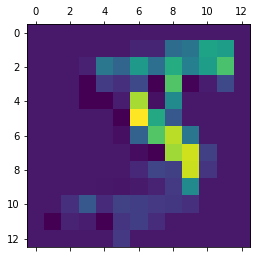

In [45]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

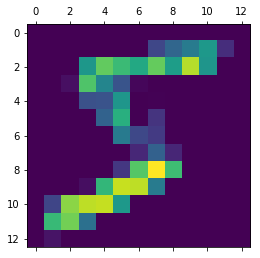

In [46]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [48]:
from tensorflow.keras import models,layers,optimizers
layer_outputs = [layer.output for layer in model.layers[:10]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_images)
first_layer_activation = activations[3]
print(first_layer_activation.shape)

(60000, 5, 5, 32)


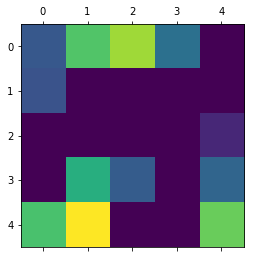

In [49]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()